In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import set_config
set_config(print_changed_only=False)

## Ujian Module 3 

* Disini saya mengambil data status karyawan yang sudah tidak aktif maupun yang sedang aktif diperusahaan.

# Problem

* Problem yang ada adalah operasional akan terhambat ketika ada karyawan yang keluar, dan tidak sedikit karyawan yang keluar dari perusahaan dengan berbagai alasan.

* Yang berarti, perusahaan mau tidak mau harus melakukan hiring kembali secara cepat sehingga operasional yang terganggu tidak berlangsung lama.

# Goal

* Goal yang dituju dalam pengolahan data ini adalah bisa mengurangi resiko operasional terganggu dan  berlangsung lama.

In [4]:
df=pd.read_csv('employee.csv')

In [5]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [6]:
df['STATUS'].value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

In [7]:
df.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['EmployeeID'].duplicated().sum()

43369

In [10]:
df.drop_duplicates(subset='EmployeeID', keep="last",inplace=True)

* Dengan melakukan penghapusan dupilkat data pada EmployeeID, kita bisa mengetahui berapa jumlah sebenarnya antara karyawan yang menetap dan juga yang sudah keluar.

* Mengambil duplikasi terakhir dari EmployeeID agar mengetahui kapan terakhir kali karyawan tercatat dalam data

In [11]:
df.shape

(6284, 18)

In [12]:
df['termreason_desc'].value_counts()

Not Applicable    4799
Retirement         885
Resignaton         385
Layoff             215
Name: termreason_desc, dtype: int64

In [13]:
df['termtype_desc'].value_counts()

Not Applicable    4799
Voluntary         1270
Involuntary        215
Name: termtype_desc, dtype: int64

In [14]:
df=df[df['termreason_desc']!= 'Retirement']
df=df[df['termtype_desc']!= 'Involuntary']

* Drop Retirement karena tidak sesuai problem
* Drop Involuntary karena tidak sesuai problem dan kemungkinan store tutup

In [15]:
df['STATUS'].value_counts()

ACTIVE        4799
TERMINATED     385
Name: STATUS, dtype: int64

In [16]:
df['STATUS_YEAR'].value_counts()

2015    4825
2012      76
2011      69
2014      55
2013      49
2010      29
2008      26
2007      25
2009      18
2006      12
Name: STATUS_YEAR, dtype: int64

In [17]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000
mean,5374.579668,41.731674,12.649498,27.549383,2014.729938
std,1891.677115,12.838793,6.940670,13.791461,1.152128
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3821.750000,30.000000,6.000000,17.000000,2015.000000
50%,5619.500000,42.000000,13.000000,28.000000,2015.000000
75%,6977.250000,53.000000,19.000000,42.000000,2015.000000
max,8336.000000,64.000000,26.000000,46.000000,2015.000000


* Perusahaan memiliki karyawan yang berumur 19 tahun hingga 65 tahun 

* Karyawan keluar paling cepat adalah dengan hitungan bulan (kurang dari 1 tahun) dan terlama adalah 26 tahun(tidak dipastikan keluar karena data berhenti pada tahun tersebut).

In [18]:
df.describe(include='O')

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184
unique,99,4398,3792,346,31,10,24,2,2,2,2,2,2
top,12/31/2015 0:00,7/26/1988,2/22/1995,1/1/1900,Vancouver,Customer Service,Cashier,M,Male,Not Applicable,Not Applicable,ACTIVE,STORES
freq,4799,4,5,4799,1167,1107,1089,2610,2610,4799,4799,4799,5172


<AxesSubplot:xlabel='STATUS', ylabel='length_of_service'>

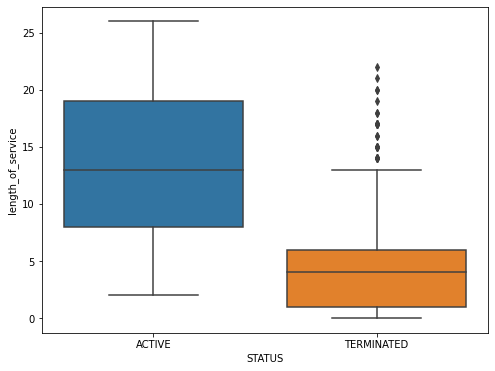

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['STATUS'], y = df['length_of_service'])

<AxesSubplot:xlabel='STATUS', ylabel='length_of_service'>

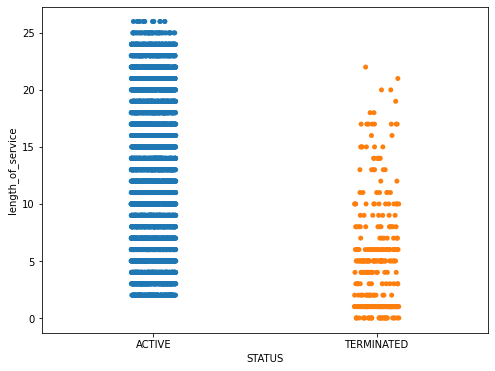

In [20]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'STATUS', y = 'length_of_service', data = df)

karyawan yang keluar dari perusahaan kebanyakan berada pada masa service yang singkat

<AxesSubplot:xlabel='gender_short', ylabel='length_of_service'>

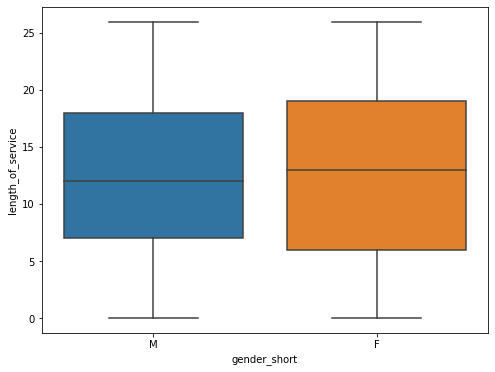

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['gender_short'], y = df['length_of_service'])

<AxesSubplot:xlabel='length_of_service', ylabel='gender_short'>

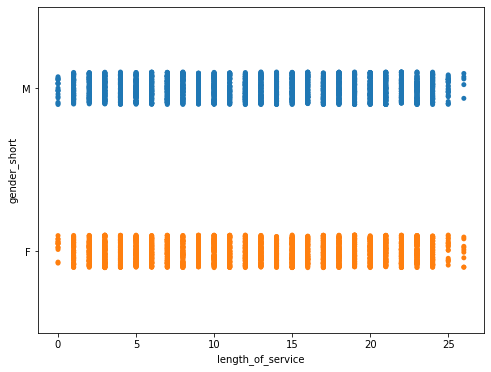

In [22]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'length_of_service', y = 'gender_short', data = df)

In [23]:
(pd.crosstab(index=df['gender_short'], columns = df['STATUS'],normalize= 'index')*100).round(2)

STATUS,ACTIVE,TERMINATED
gender_short,,
F,91.80,8.20
M,93.33,6.67


Pengaruh Gender tidak terlalu besar dibanding dengan status di perusahaan

In [24]:
bins= [19,30,55,65]
labels = [1,2,3]
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,3,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
19,1319,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,3,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
29,1320,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,3,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
39,1321,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,3,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
49,1322,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,3,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49643,8188,10/1/2014 0:00,10/22/1993,4/25/2013,10/25/2014,1,1,Victoria,Customer Service,Cashier,46,F,Female,Resignaton,Voluntary,2014,TERMINATED,STORES
49645,8223,10/1/2013 0:00,2/11/1994,6/24/2013,10/17/2013,1,0,Trail,Customer Service,Cashier,33,M,Male,Resignaton,Voluntary,2013,TERMINATED,STORES
49646,8226,9/1/2013 0:00,2/16/1994,6/26/2013,9/14/2013,1,0,Victoria,Customer Service,Cashier,46,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,1,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [25]:
df['STATUS'] = df['STATUS'].map({'ACTIVE': 0, 'TERMINATED': 1}).round(1)

In [26]:
df['department_name'].value_counts()

Customer Service    1107
Dairy                906
Meats                904
Bakery               816
Produce              734
Processed Foods      700
Executive             10
Store Management       5
HR Technology          1
Recruitment            1
Name: department_name, dtype: int64

In [27]:
df=df.groupby('department_name').filter(lambda x : len(x)>=720)

melakukan drop karena value terlalu sedikit, sehingga data menjadi bias

In [28]:
(pd.crosstab(index=df['department_name'], columns = df['STATUS'],normalize= 'index')*100).round(2)

STATUS,0,1
department_name,,
Bakery,96.32,3.68
Customer Service,83.83,16.17
Dairy,92.94,7.06
Meats,96.79,3.21
Produce,96.32,3.68


In [29]:
df['BUSINESS_UNIT'].value_counts()

STORES    4467
Name: BUSINESS_UNIT, dtype: int64

In [30]:
(pd.crosstab(index=df['BUSINESS_UNIT'], columns = df['STATUS'],normalize= 'index')*100).round(2)

STATUS,0,1
BUSINESS_UNIT,,
STORES,92.63,7.37


In [31]:
df['store_name'].value_counts()

46    472
18    345
42    337
21    295
43    242
44    239
16    238
26    216
5     213
15    195
8     161
31    146
41    142
29    134
32    114
6     112
33     89
17     83
36     81
30     77
1      73
28     67
22     63
40     59
38     58
12     56
2      52
25     49
19     31
3      16
20      4
11      3
35      3
13      1
9       1
Name: store_name, dtype: int64

In [32]:
(pd.crosstab(index=df['store_name'], columns = df['STATUS'],normalize= 'index')*100).round(2)

STATUS,0,1
store_name,,
1,93.15,6.85
2,98.08,1.92
3,81.25,18.75
5,96.24,3.76
6,89.29,10.71
8,96.27,3.73
9,0.00,100.00
11,0.00,100.00
12,87.50,12.50


In [33]:
df=df.groupby('store_name').filter(lambda x : len(x)>=10)

In [34]:
(pd.crosstab(index=df['city_name'], columns = df['STATUS'],normalize= 'index')*100).round(2)

STATUS,0,1
city_name,,
Abbotsford,93.15,6.85
Aldergrove,98.08,1.92
Bella Bella,81.25,18.75
Burnaby,96.24,3.76
Chilliwack,89.29,10.71
Cranbrook,96.27,3.73
Fort St John,87.50,12.50
Kamloops,91.79,8.21
Kelowna,90.34,9.66


Drop store dengan keryawan keluar sebanyak 100% karena kemungkinan Bias, data tidak tercatat, atau store tidak jadi beroperasional

In [35]:
df['job_title'].value_counts()

Cashier                     1087
Dairy Person                 902
Meat Cutter                  893
Baker                        801
Produce Clerk                719
Customer Service Manager      18
Bakery Manager                12
Produce Manager               12
Meats Manager                 11
Name: job_title, dtype: int64

In [36]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

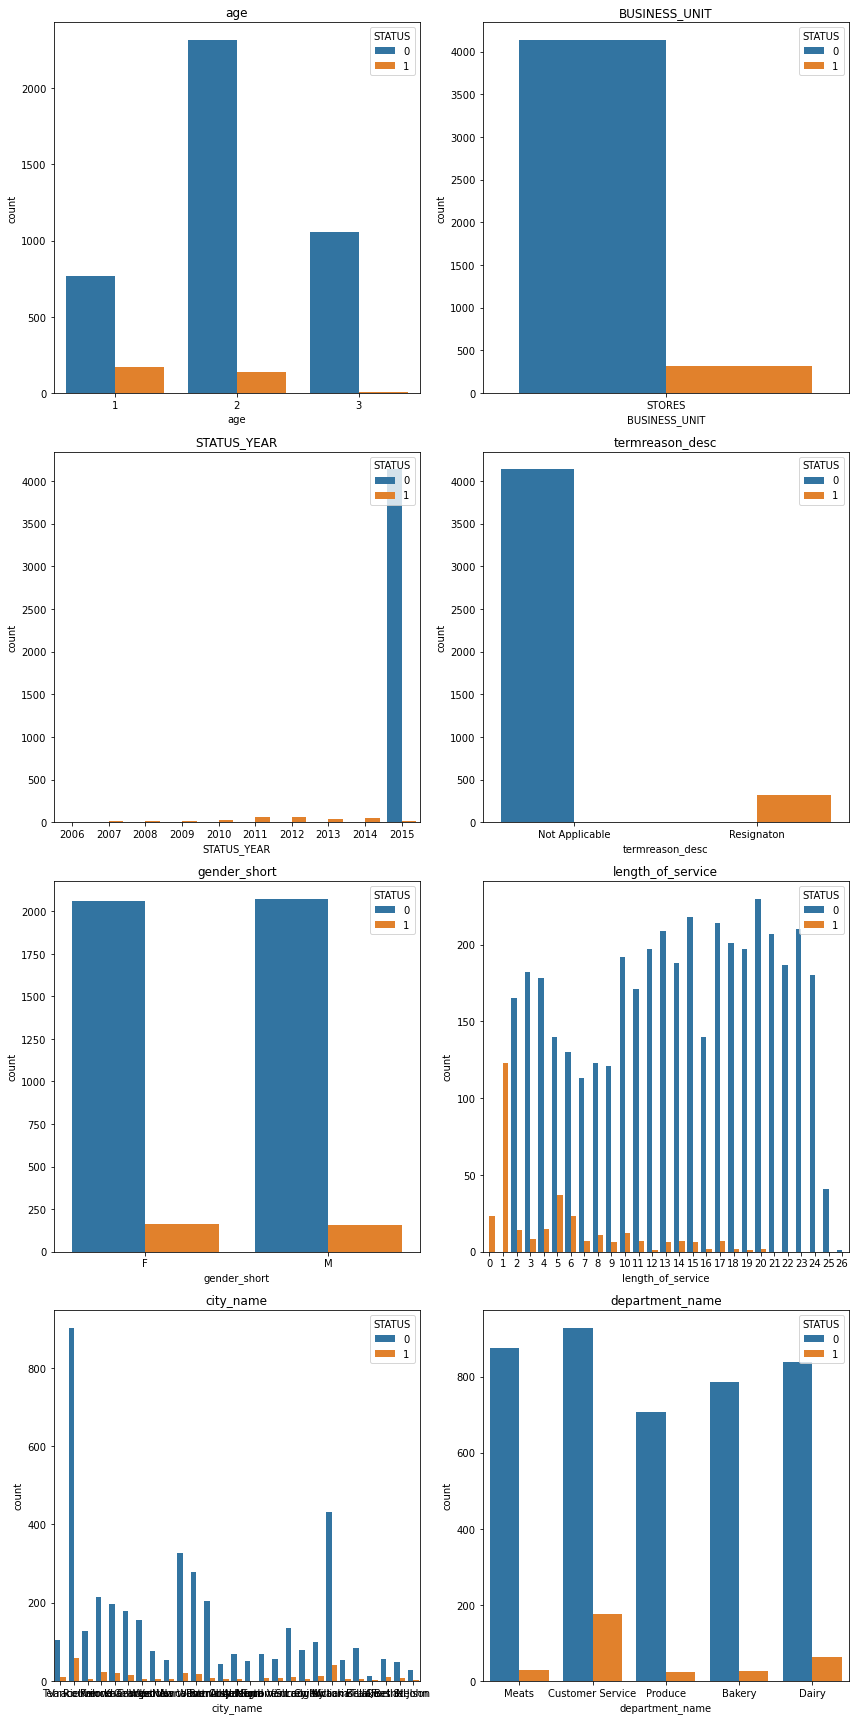

In [37]:
cols=['age','BUSINESS_UNIT','STATUS_YEAR','termreason_desc','gender_short','length_of_service','city_name','department_name']
n_rows=4
n_cols=2

fix,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6, n_rows*6))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(df[cols[i]],hue=df['STATUS'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='STATUS',loc='upper right')

plt.tight_layout()

In [38]:
df1=pd.read_csv('employee.csv')

In [39]:
dfcs=df1[df1['department_name'] == 'Customer Service']
dfcs=df1[df1['STATUS'] == 'TERMINATED' ]
dfcs=dfcs[dfcs['termreason_desc'] != 'Retirement' ]
dfcs=dfcs[dfcs['termreason_desc'] != 'Layoff' ]

In [40]:
dfcs

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
48186,1365,9/1/2012 0:00,3/24/1949,10/10/1989,9/26/2012,63,22,Fort St John,Store Management,Store Manager,12,F,Female,Resignaton,Voluntary,2012,TERMINATED,STORES
48265,1484,7/1/2007 0:00,11/22/1949,2/15/1990,7/25/2007,57,17,Vancouver,HR Technology,HRIS Analyst,35,M,Male,Resignaton,Voluntary,2007,TERMINATED,HEADOFFICE
48354,1624,3/1/2011 0:00,8/3/1950,6/29/1990,3/26/2011,60,20,Vancouver,Dairy,Dairy Person,41,F,Female,Resignaton,Voluntary,2011,TERMINATED,STORES
48372,1653,10/1/2011 0:00,10/12/1950,8/5/1990,10/31/2011,61,21,Prince George,Processed Foods,Processed Foods Manager,26,F,Female,Resignaton,Voluntary,2011,TERMINATED,STORES
48395,1714,10/1/2007 0:00,1/30/1951,10/2/1990,10/11/2007,56,17,Fort St John,Dairy,Dairy Person,12,M,Male,Resignaton,Voluntary,2007,TERMINATED,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49643,8188,10/1/2014 0:00,10/22/1993,4/25/2013,10/25/2014,21,1,Victoria,Customer Service,Cashier,46,F,Female,Resignaton,Voluntary,2014,TERMINATED,STORES
49645,8223,10/1/2013 0:00,2/11/1994,6/24/2013,10/17/2013,19,0,Trail,Customer Service,Cashier,33,M,Male,Resignaton,Voluntary,2013,TERMINATED,STORES
49646,8226,9/1/2013 0:00,2/16/1994,6/26/2013,9/14/2013,19,0,Victoria,Customer Service,Cashier,46,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


<AxesSubplot:xlabel='job_title', ylabel='length_of_service'>

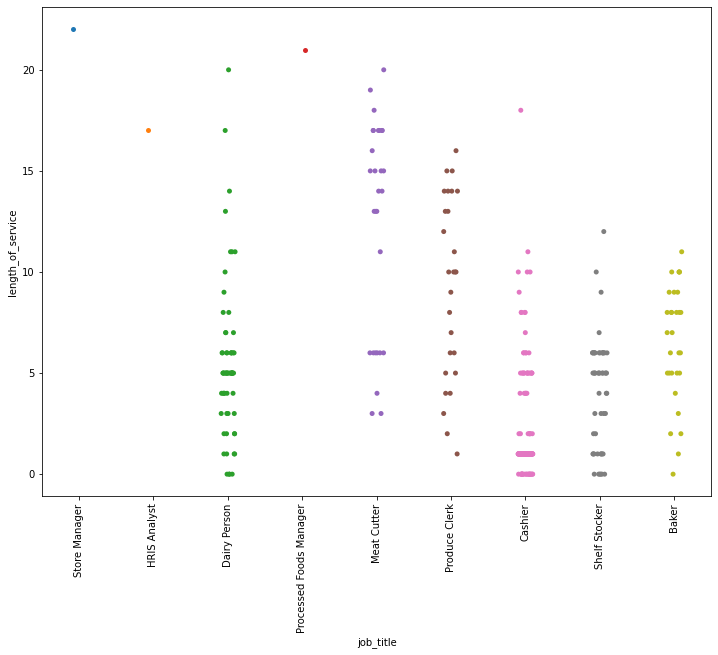

In [41]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.stripplot(x = 'job_title', y = 'length_of_service', data = dfcs)

In [42]:
dfda=df1[df1['department_name'] == 'Dairy']
dfda=df1[df1['STATUS'] == 'TERMINATED' ]
dfda=dfda[dfda['termreason_desc'] != 'Retirement' ]
dfda=dfda[dfda['termreason_desc'] != 'Layoff' ]

<AxesSubplot:xlabel='job_title', ylabel='length_of_service'>

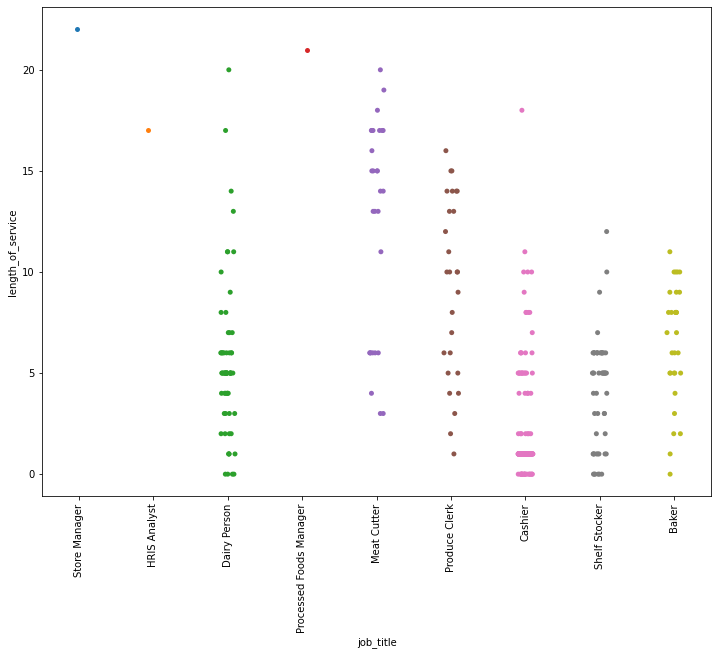

In [43]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.stripplot(x = 'job_title', y = 'length_of_service', data = dfda)

# Kesimpulan 

* Karyawan yang melakukan resign atau keluar dari perusahaan terbanyak pada tahun pertama dan ke-5. 

* Department yang karyawannya paling sering resign adalah Customer service dan juga Dairy. 

* Karyawan keluar paling banyak berada dibawah 10 tahun. bisa jadi dikarenakan jabatan tidak naik, ataupun ingin profesi yang lebih memiliki jenjang karier.

* Gender tidak berpengaruh pada keputusan karyawan untuk keluar atau menetap di perusahaan.

# Solusi 

* Berikan setidaknya penjelasan jenjang karier dan gaji yang jelas untuk new-entry (1-10 tahun).
* Berikan pelatihan dan test singkat untuk kenaikan jabatan.

# Machine Learning 

<AxesSubplot:>

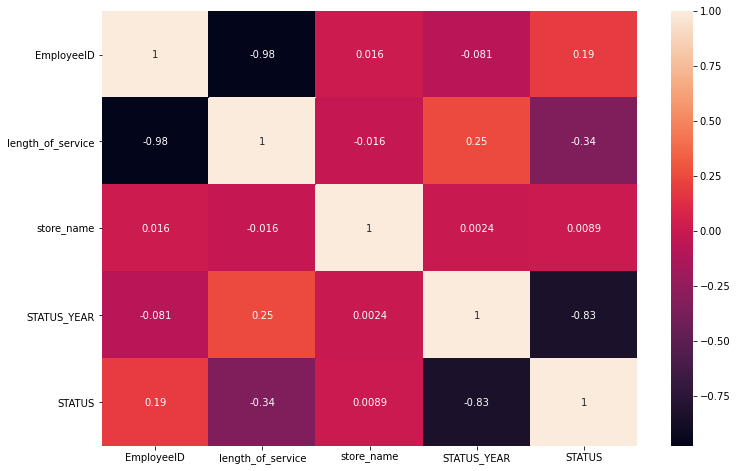

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [45]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [46]:
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
99,1330,12/31/2015 0:00,1/25/1967,9/9/1989,1/1/1900,2,26,Terrace,Meats,Meats Manager,32,F,Female,Not Applicable,Not Applicable,2015,0,STORES
1550,1703,12/31/2015 0:00,1/13/1951,9/23/1990,1/1/1900,3,25,Vancouver,Meats,Meats Manager,43,F,Female,Not Applicable,Not Applicable,2015,0,STORES
1560,1705,12/31/2015 0:00,1/15/1951,9/24/1990,1/1/1900,3,25,Richmond,Meats,Meats Manager,29,M,Male,Not Applicable,Not Applicable,2015,0,STORES
1570,1706,12/31/2015 0:00,1/20/1951,9/27/1990,1/1/1900,3,25,Kelowna,Meats,Meat Cutter,16,M,Male,Not Applicable,Not Applicable,2015,0,STORES
1580,1710,12/31/2015 0:00,1/24/1951,9/29/1990,1/1/1900,3,25,Prince George,Customer Service,Customer Service Manager,26,M,Male,Not Applicable,Not Applicable,2015,0,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49643,8188,10/1/2014 0:00,10/22/1993,4/25/2013,10/25/2014,1,1,Victoria,Customer Service,Cashier,46,F,Female,Resignaton,Voluntary,2014,1,STORES
49645,8223,10/1/2013 0:00,2/11/1994,6/24/2013,10/17/2013,1,0,Trail,Customer Service,Cashier,33,M,Male,Resignaton,Voluntary,2013,1,STORES
49646,8226,9/1/2013 0:00,2/16/1994,6/26/2013,9/14/2013,1,0,Victoria,Customer Service,Cashier,46,F,Female,Resignaton,Voluntary,2013,1,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,1,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,1,STORES


In [47]:
df=df.drop(columns=['EmployeeID','recorddate_key','birthdate_key','orighiredate_key','terminationdate_key','city_name','gender_full','STATUS_YEAR','termtype_desc','termreason_desc'])

In [48]:
df

,age,length_of_service,department_name,job_title,store_name,gender_short,STATUS,BUSINESS_UNIT
99,2,26,Meats,Meats Manager,32,F,0,STORES
1550,3,25,Meats,Meats Manager,43,F,0,STORES
1560,3,25,Meats,Meats Manager,29,M,0,STORES
1570,3,25,Meats,Meat Cutter,16,M,0,STORES
1580,3,25,Customer Service,Customer Service Manager,26,M,0,STORES
...,...,...,...,...,...,...,...,...
49643,1,1,Customer Service,Cashier,46,F,1,STORES
49645,1,0,Customer Service,Cashier,33,M,1,STORES
49646,1,0,Customer Service,Cashier,46,F,1,STORES
49649,1,0,Customer Service,Cashier,44,F,1,STORES


In [49]:
df['STATUS'].value_counts()

0    4135
1     320
Name: STATUS, dtype: int64

In [50]:
from sklearn.utils import resample

In [51]:
stay = df[df['STATUS'] == 0] ## Kelas Majority
resign = df[df['STATUS'] == 1] ## Kelas Minority

In [52]:
resign_oversample = resample(resign, ## Kelas Minority
                           replace=True,
                           n_samples = len(stay), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [53]:
df= pd.concat([stay, resign_oversample])

In [54]:
df['gender_short'] = df['gender_short'].map({'M': 1, 'F': 0}).round(1)

In [55]:
df=pd.get_dummies(data=df, columns=['department_name'], prefix_sep='-')
df=pd.get_dummies(data=df, columns=['job_title'], prefix_sep='-')
df=pd.get_dummies(data=df, columns=['BUSINESS_UNIT'], prefix_sep='-')

In [56]:
df

,age,length_of_service,store_name,gender_short,STATUS,department_name-Bakery,department_name-Customer Service,department_name-Dairy,department_name-Meats,department_name-Produce,job_title-Baker,job_title-Bakery Manager,job_title-Cashier,job_title-Customer Service Manager,job_title-Dairy Person,job_title-Meat Cutter,job_title-Meats Manager,job_title-Produce Clerk,job_title-Produce Manager,BUSINESS_UNIT-STORES
99,2,26,32,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1550,3,25,43,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1560,3,25,29,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1570,3,25,16,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1580,3,25,26,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49312,1,1,46,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
49282,2,5,16,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
49529,1,1,18,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
49212,2,10,15,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [57]:
X = df.drop(columns='STATUS')
y = df['STATUS']

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state = 0)

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn_cf=KNeighborsClassifier()
knn_cf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
print(knn_cf.score(X_train,y_train))

0.9860943168077388


In [61]:
param_KNN = {"n_neighbors" : [5, 10, 25, 35, 75],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

model_knn = GridSearchCV(estimator=knn_cf, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1 )
model_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 35, 75], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [62]:
print(model_knn.score(X_train,y_train))

0.9915356711003628


In [63]:
y_pred_knn = knn_cf.predict(X_test)
y_pred_knn_tuned = model_knn.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.9727932285368803

In [65]:
acc_knn_tuned= accuracy_score(y_test, y_pred_knn_tuned)
acc_knn_tuned

0.9806529625151149

In [66]:
cm = confusion_matrix(y_test, y_pred_knn, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_knn = precision_score(y_test, y_pred_knn)

rec_knn = recall_score(y_test, y_pred_knn, pos_label=1)

f1_knn = f1_score(y_test, y_pred_knn)

recall_score(y_test, y_pred_knn, pos_label=0)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       834
           1       0.95      1.00      0.97       820

    accuracy                           0.97      1654
   macro avg       0.97      0.97      0.97      1654
weighted avg       0.97      0.97      0.97      1654



In [67]:
cm = confusion_matrix(y_test, y_pred_knn_tuned, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_knn = precision_score(y_test, y_pred_knn_tuned)

rec_knn = recall_score(y_test, y_pred_knn_tuned, pos_label=1)

f1_knn = f1_score(y_test, y_pred_knn_tuned)

recall_score(y_test, y_pred_knn_tuned, pos_label=0)

print(classification_report(y_test, y_pred_knn_tuned))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       834
           1       0.96      1.00      0.98       820

    accuracy                           0.98      1654
   macro avg       0.98      0.98      0.98      1654
weighted avg       0.98      0.98      0.98      1654



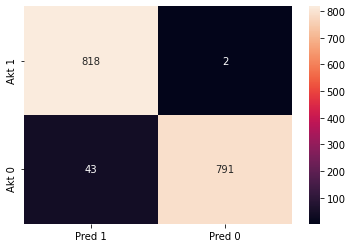

In [68]:
y_KNN = knn_cf.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True,fmt='d')
plt.show()

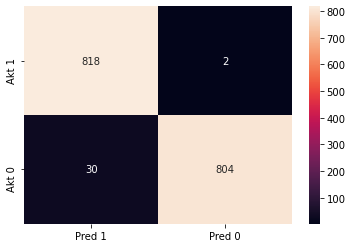

In [69]:
y_KNN = model_knn.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True,fmt='d')
plt.show()

 # Random Forest 

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
print(RF.score(X_train,y_train))

0.9916868198307134


In [72]:
param_RF = {"n_estimators" : [100, 200],
          "max_depth" : [None, 5],
          "min_samples_split" : [2, 9],
          "min_samples_leaf" : [1, 2],
          "max_features" : [None, .8]}

model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 4, n_jobs=-1, verbose=1)
model_RF.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   41.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [73]:
print(model_RF.score(X_train, y_train))

0.9916868198307134


In [74]:
y_pred_rf = RF.predict(X_test)
y_pred_rf_tuned=model_RF.predict(X_test)

In [75]:
acc_RF = accuracy_score(y_test, y_pred_rf)
acc_RF

0.9824667472793228

In [76]:
acc_RF_tuned = accuracy_score(y_test, y_pred_rf_tuned)
acc_RF_tuned

0.9836759371221282

In [77]:
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred_rf)

rec_RF = recall_score(y_test, y_pred_rf, pos_label=1)

f1_RF = f1_score(y_test, y_pred_rf)

recall_score(y_test, y_pred_rf, pos_label=0)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       834
           1       0.97      1.00      0.98       820

    accuracy                           0.98      1654
   macro avg       0.98      0.98      0.98      1654
weighted avg       0.98      0.98      0.98      1654



In [78]:
cm = confusion_matrix(y_test, y_pred_rf_tuned, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred_rf)

rec_RF = recall_score(y_test, y_pred_rf, pos_label=1)

f1_RF = f1_score(y_test, y_pred_rf)

recall_score(y_test, y_pred_rf, pos_label=0)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       834
           1       0.97      1.00      0.98       820

    accuracy                           0.98      1654
   macro avg       0.98      0.98      0.98      1654
weighted avg       0.98      0.98      0.98      1654



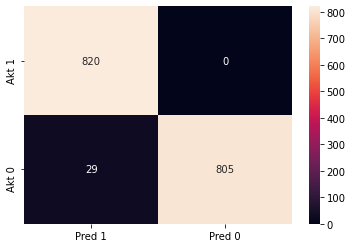

In [79]:
y_RF = RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True,fmt='d')
plt.show()

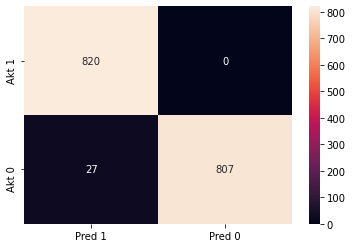

In [80]:
y_RF = model_RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True,fmt='d')
plt.show()

# TREE

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
print(tree.score(X_train,y_train))

0.9916868198307134


In [83]:
param_tree = {"ccp_alpha" : [0],
          "max_depth" : [5],
          "min_samples_split" : [3],
          "min_samples_leaf" : [1],
          "max_features" : [None]}

model_tree = GridSearchCV(estimator=tree, param_grid=param_tree, cv = 4, n_jobs=-1, verbose=1)
model_tree.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': [0], 'max_depth': [5],
                   

In [84]:
model_tree.score(X_train, y_train)

0.8875453446191052

In [85]:
y_pred_tree = tree.predict(X_test)
y_pred_tree_tuned = model_tree.predict(X_test)

In [86]:
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_tree

0.9824667472793228

In [87]:
acc_tree_tuned = accuracy_score(y_test, y_pred_tree_tuned)
acc_tree_tuned

0.8730350665054414

In [88]:
cm = confusion_matrix(y_test, y_pred_tree, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_tree = precision_score(y_test, y_pred_tree)

rec_tree = recall_score(y_test, y_pred_tree, pos_label=1)

f1_tree = f1_score(y_test, y_pred_tree)

recall_score(y_test, y_pred_tree, pos_label=0)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       834
           1       0.97      1.00      0.98       820

    accuracy                           0.98      1654
   macro avg       0.98      0.98      0.98      1654
weighted avg       0.98      0.98      0.98      1654



In [89]:
cm = confusion_matrix(y_test, y_pred_tree_tuned, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_tree = precision_score(y_test, y_pred_tree_tuned)

rec_tree = recall_score(y_test, y_pred_tree_tuned, pos_label=1)

f1_tree = f1_score(y_test, y_pred_tree_tuned)

recall_score(y_test, y_pred_tree_tuned, pos_label=0)

print(classification_report(y_test, y_pred_tree_tuned))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       834
           1       0.86      0.88      0.87       820

    accuracy                           0.87      1654
   macro avg       0.87      0.87      0.87      1654
weighted avg       0.87      0.87      0.87      1654



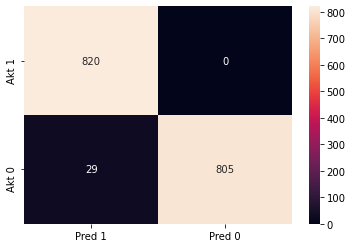

In [90]:
y_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_tree, labels=[1, 0])
df_tree = pd.DataFrame(data=cm_tree, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_tree, annot=True,fmt='d')
plt.show()

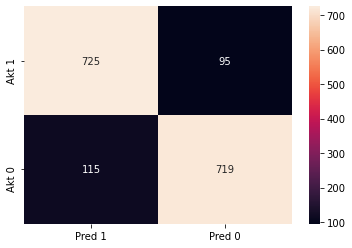

In [91]:
y_tree = model_tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_tree, labels=[1, 0])
df_tree = pd.DataFrame(data=cm_tree, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_tree, annot=True,fmt='d')
plt.show()

# AUC 

In [92]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [93]:
y_pred_rf =model_RF.predict(X_test)

In [94]:
roc_auc_score(y_test, y_pred_rf)

0.9838129496402878

In [95]:
y_proba_rf = model_RF.predict_proba(X_test)

In [96]:
pred_1 = y_proba_rf[ : , 1]

In [97]:
roc_curve(y_test, pred_1)

(array([0.        , 0.00359712, 0.00479616, 0.00839329, 0.00839329,
        0.01079137, 0.01079137, 0.01199041, 0.01199041, 0.01318945,
        0.01318945, 0.01318945, 0.01438849, 0.01438849, 0.01558753,
        0.02038369, 0.02158273, 0.02158273, 0.02517986, 0.0263789 ,
        0.02757794, 0.0323741 , 0.0323741 , 0.03717026, 0.04076739,
        0.04196643, 0.04676259, 0.05035971, 0.05395683, 0.05755396,
        0.06115108, 0.06235012, 0.0647482 , 0.06594724, 0.06834532,
        0.07673861, 0.08033573, 0.08273381, 0.08872902, 0.0911271 ,
        0.09472422, 0.10071942, 0.10431655, 0.10791367, 0.11151079,
        1.        ]),
 array([0.        , 0.92804878, 0.93170732, 0.95487805, 0.95609756,
        0.95853659, 0.96097561, 0.96341463, 0.9695122 , 0.9695122 ,
        0.97073171, 0.97317073, 0.97682927, 0.9804878 , 0.98170732,
        0.98902439, 0.98902439, 0.99512195, 0.99512195, 0.99512195,
        0.99756098, 0.99756098, 1.        , 1.        , 1.        ,
        1.        , 1.    

In [98]:
fpr, tpr, threshold = roc_curve(y_test, pred_1)

In [99]:
score_auc = round(auc(fpr, tpr),2)

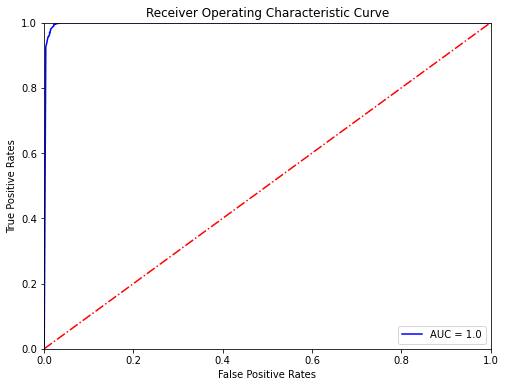

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b', label=f"AUC = {score_auc}")
plt.plot([0, 1], [0, 1], 'r-.')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title("Receiver Operating Characteristic Curve")
plt.legend()
plt.show()

* Recall adalah perbandingan antara True Positive dengan False Negative.

*  Precession score adalah perbandingan antara True Positive dengan False Positive.

* Disini saya memfokuskan evaluation matrix kepada precision, karena False Positive lebih tidak beresiko dibanding false negative

### Saya akan menggunakan Model Random Forest

In [101]:
import joblib

In [102]:
joblib.dump(RF,'modelRF')

['modelRF']

In [103]:
model = joblib.load('modelRF')

In [104]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)